In [44]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (15, 12)
plt.style.use('seaborn-darkgrid')
import seaborn as sns
sns.set_style('darkgrid')
from datetime import datetime, timedelta

In [45]:
xfeat = ['Open', 'High', 'Low', 'Close', 'Volume']
df = data[xfeat]
df

,Open,High,Low,Close,Volume
2011-12-15,154.740005,154.949997,151.710007,152.330002,21521900
2011-12-16,154.309998,155.369995,153.899994,155.229996,18124300
2011-12-17,154.309998,155.369995,153.899994,155.229996,18124300
2011-12-18,154.309998,155.369995,153.899994,155.229996,18124300
2011-12-19,155.479996,155.860001,154.360001,154.869995,12547200
...,...,...,...,...,...
2018-12-27,120.570000,120.900002,120.139999,120.570000,11874400
2018-12-28,120.800003,121.080002,120.720001,121.059998,6864700
2018-12-29,120.800003,121.080002,120.720001,121.059998,6864700
2018-12-30,120.800003,121.080002,120.720001,121.059998,6864700


In [46]:
def log_return(series, periods = 1) :
    return np.log(series).diff(periods = periods)

In [47]:
df['Target'] = log_return(df['Open']).shift(-1)
df

<ipython-input-47-55fdcbf55490>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Target'] = log_return(df['Open']).shift(-1)


,Open,High,Low,Close,Volume,Target
2011-12-15,154.740005,154.949997,151.710007,152.330002,21521900,-0.002783
2011-12-16,154.309998,155.369995,153.899994,155.229996,18124300,0.000000
2011-12-17,154.309998,155.369995,153.899994,155.229996,18124300,0.000000
2011-12-18,154.309998,155.369995,153.899994,155.229996,18124300,0.007554
2011-12-19,155.479996,155.860001,154.360001,154.869995,12547200,0.008582
...,...,...,...,...,...,...
2018-12-27,120.570000,120.900002,120.139999,120.570000,11874400,0.001906
2018-12-28,120.800003,121.080002,120.720001,121.059998,6864700,0.000000
2018-12-29,120.800003,121.080002,120.720001,121.059998,6864700,0.000000
2018-12-30,120.800003,121.080002,120.720001,121.059998,6864700,0.001489


In [48]:
from sklearn.model_selection import train_test_split
xtrain, xval, ytrain, yval = train_test_split(df[xfeat].iloc[:-1], df['Target'].dropna(), test_size = .15, shuffle = False)

In [49]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, HuberRegressor
from sklearn.pipeline import make_pipeline

In [50]:
model = make_pipeline(StandardScaler(), LinearRegression()).fit(xtrain, ytrain)

In [51]:
yhat = model.predict(xval)
print(yhat[:15])

[-0.00039015 -0.00260663  0.00250563  0.00495978 -0.00082684 -0.00096717
 -0.00096717 -0.00096717  0.00037757  0.0001179   0.00050372  0.00075491
  0.00105293  0.00105293  0.00105293]


In [52]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(yval, yhat))
print('rmse :', rmse)
correlation = np.corrcoef(yval, yhat)[1, 0]
print('Correlation :', correlation)

rmse : 0.004149052521566064
Correlation : 0.4914422402595965


In [53]:
yhat = pd.Series(
    yhat, index = yval.index
)

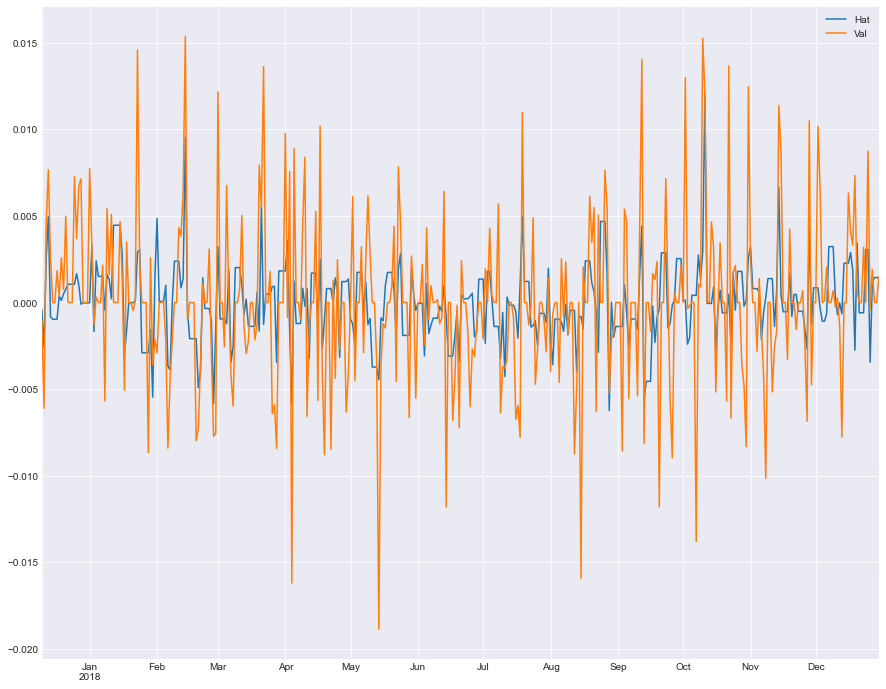

In [54]:
yhat.plot.line(label = 'Hat')
yval.plot.line(label = 'Val')
plt.legend()
plt.show()

In [55]:
model = make_pipeline(RobustScaler(), LinearRegression()).fit(xtrain, ytrain)
yhat = pd.Series(
    model.predict(xval), index = yval.index
)

In [56]:
rmse = np.sqrt(mean_squared_error(yval, yhat))
print(rmse)

0.004149052521566063


In [57]:
correlation = np.corrcoef(yval, yhat)[1, 0]
print(correlation)

0.49144224025959676


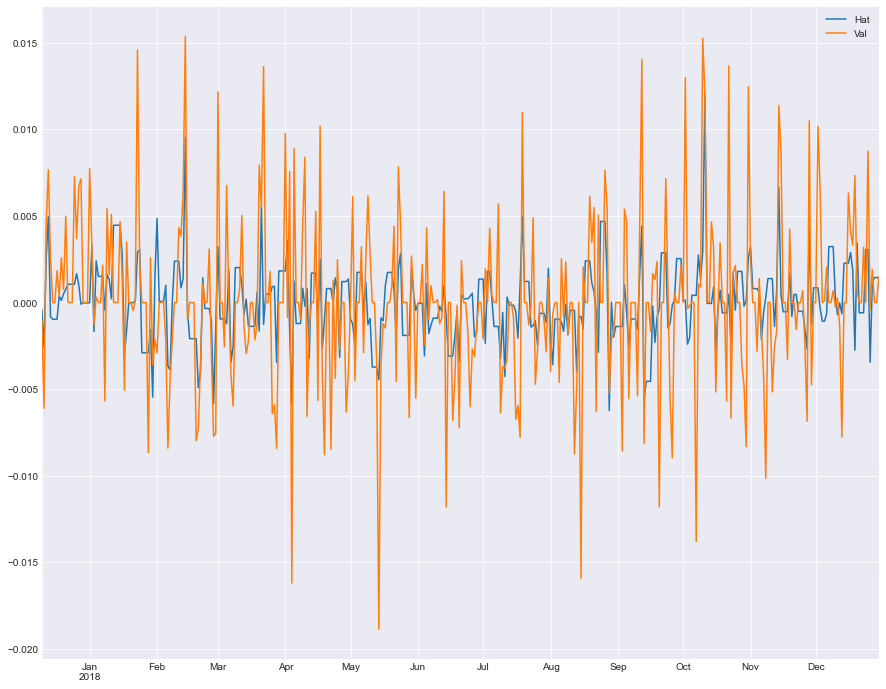

In [58]:
yhat.plot.line(label = 'Hat')
yval.plot.line(label = 'Val')
plt.legend()
plt.show()

In [59]:
model = make_pipeline(MinMaxScaler(), LinearRegression()).fit(xtrain, ytrain)
yhat = pd.Series(
    model.predict(xval),
    index = yval.index
)

In [60]:
print(np.sqrt(mean_squared_error(yval, yhat)))

0.004149052521566067


In [61]:
print(np.corrcoef(yval, yhat)[1, 0])

0.4914422402595954


In [62]:
model = make_pipeline(RobustScaler(), Lasso(alpha = 15)).fit(xtrain, ytrain)
yhat = pd.Series(
    model.predict(xval),
    index = yval.index
)

In [63]:
print(np.sqrt(mean_squared_error(yval, yhat)))
print(np.corrcoef(yval, yhat)[1, 0])

0.004764872394341432
4.9078494530639126e-17


<AxesSubplot:>

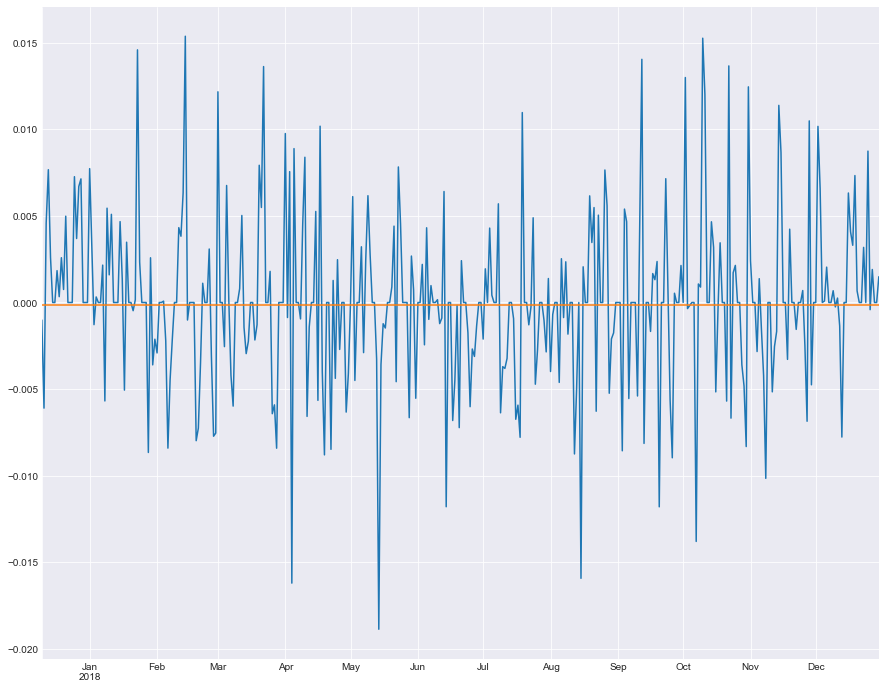

In [64]:
yval.plot.line()
yhat.plot.line()

In [65]:
model = Ridge(normalize = True, alpha = 1e-5).fit(xtrain, ytrain)
yhat = pd.Series(
    model.predict(xval), index = xval.index
)

In [66]:
print(np.sqrt(mean_squared_error(yval, yhat)))
print(np.corrcoef(yval, yhat)[1, 0])

0.004149282289434069
0.4917061914175488


<AxesSubplot:>

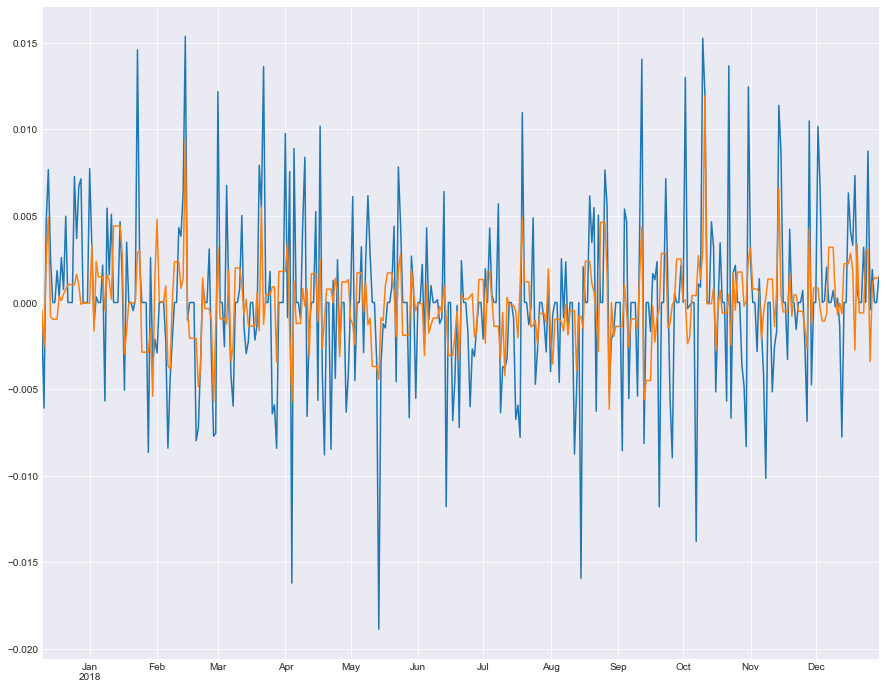

In [67]:
yval.plot.line()
yhat.plot.line()

In [68]:
from sklearn.svm import SVR

In [69]:
model = SVR(C = 60, kernel = 'linear').fit(xtrain, ytrain)
yhat = pd.Series(
    model.predict(xval), index = xval.index
)

In [71]:
print(np.sqrt(mean_squared_error(yval, yhat)))
print(np.corrcoef(yval, yhat)[1, 0])

0.01915909635003534
nan


C:\Users\RAJESH KANNAN M\anaconda3\lib\site-packages\numpy\lib\function_base.py:2642: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\RAJESH KANNAN M\anaconda3\lib\site-packages\numpy\lib\function_base.py:2643: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


<AxesSubplot:>

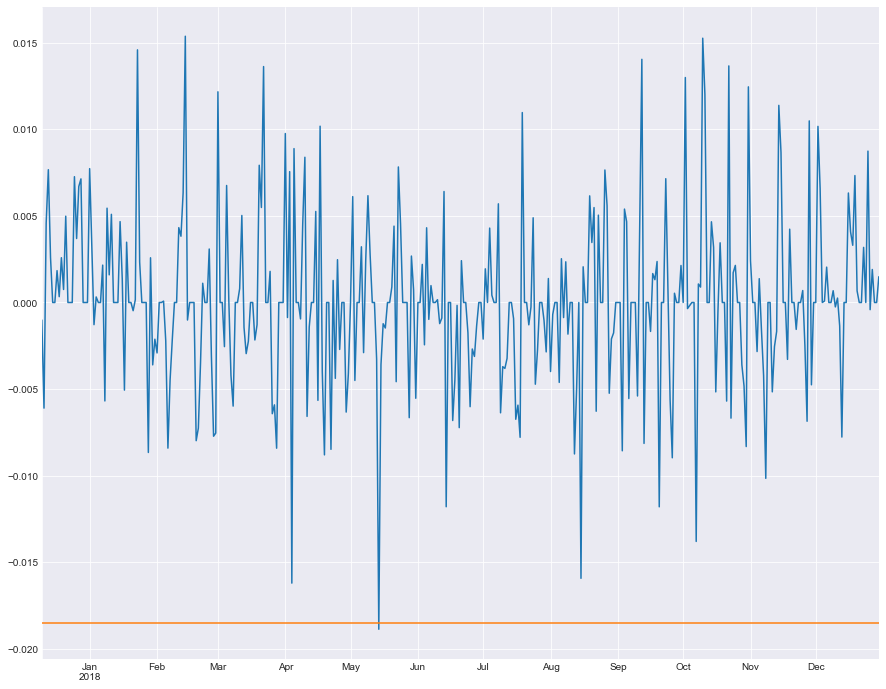

In [72]:
yval.plot.line()
yhat.plot.line()

In [73]:
from sklearn.tree import DecisionTreeRegressor

In [74]:
model = DecisionTreeRegressor(max_depth = None, random_state = 5).fit(xtrain, ytrain)
yhat = pd.Series(
    model.predict(xval), index = xval.index
)
print(np.sqrt(mean_squared_error(yval, yhat)))
print(np.corrcoef(yval, yhat)[1, 0])

0.00877262231988218
0.15247977397187282


In [75]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state = 50, n_jobs = -1, n_estimators = 800, max_depth = None).fit(xtrain, ytrain)
yhat = pd.Series(
    model.predict(xval), index = xval.index
)
print(np.sqrt(mean_squared_error(yval, yhat)))
print(np.corrcoef(yval, yhat)[1, 0])
print('')

0.00467348445387285
0.31221446818386983



RMSE : 0.004673484453872851
Correlation : 0.31221446818386983


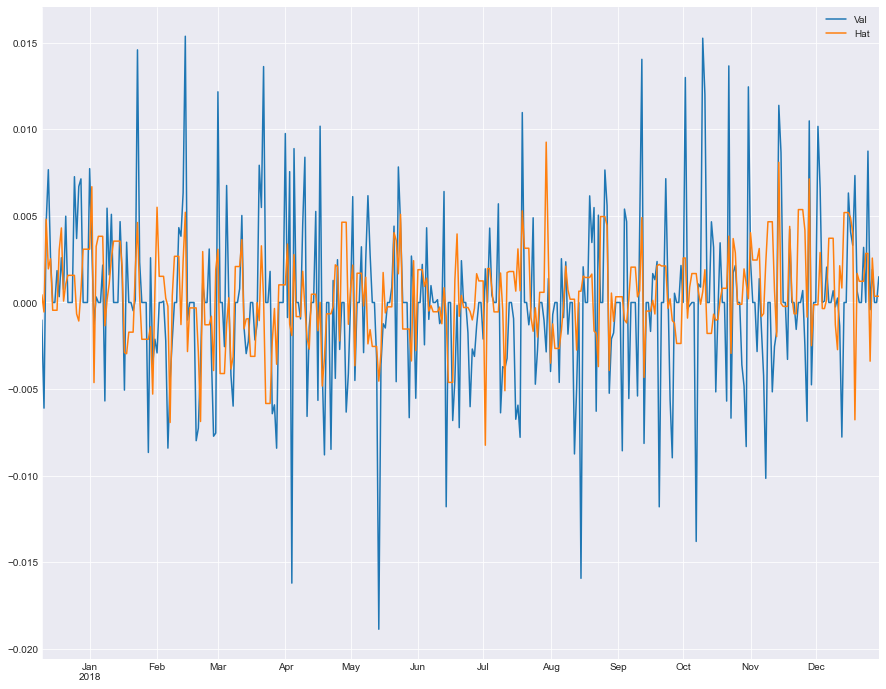

In [81]:
yhat = pd.Series(
    model.predict(xval), index = xval.index
)
print('RMSE :', np.sqrt(np.mean(np.square(yval - yhat))))
print('Correlation :', np.corrcoef(yval, yhat)[1, 0])
yval.plot.line(label = 'Val')
yhat.plot.line(label = 'Hat')
plt.legend()
plt.show()

In [82]:
xval

,Open,High,Low,Close,Volume
2017-12-10,118.489998,118.919998,118.330002,118.480003,5231300
2017-12-11,118.370003,118.540001,117.800003,118.010002,4522200
2017-12-12,117.650002,118.169998,117.400002,118.150002,8020100
2017-12-13,118.190002,119.349998,118.010002,119.169998,10086700
2017-12-14,119.099998,119.290001,118.709999,118.930000,6993600
...,...,...,...,...,...
2018-12-26,120.620003,121.000000,119.570000,119.660004,14293500
2018-12-27,120.570000,120.900002,120.139999,120.570000,11874400
2018-12-28,120.800003,121.080002,120.720001,121.059998,6864700
2018-12-29,120.800003,121.080002,120.720001,121.059998,6864700


In [83]:
pred = np.exp(np.log(xval['Open']) + yhat).shift(1).dropna()
true = xval['Open'].iloc[1:]

In [84]:
np.sqrt(np.mean(np.square(np.log1p(pred) - np.log1p(true))))

0.004640353119488452

In [85]:
from sklearn.metrics import mean_squared_log_error
np.sqrt(mean_squared_log_error(true, pred))

0.004640353119488453

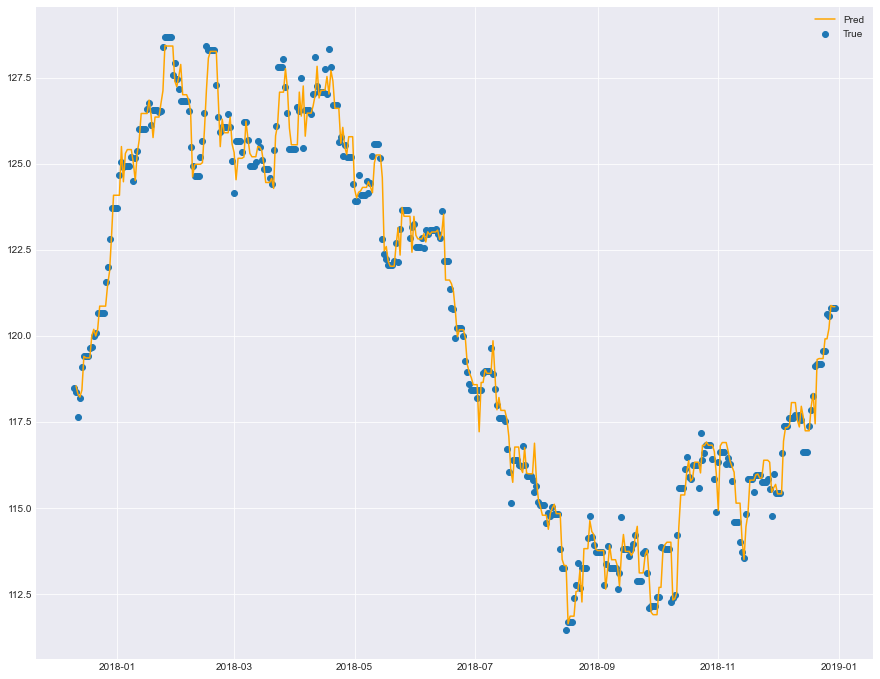

In [86]:
plt.scatter(xval.index, xval['Open'], label = 'True')
plt.plot(pred, label = 'Pred', color = 'orange')
plt.legend()
plt.show()